# Baseline
Get the baseline using 5-fold CV on Training Data

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# df_merged_15x15

In [2]:
df_merged_mean_15x15 = pd.read_csv('data/df_merged_zero_15x15_final.csv')
df_merged_mean_15x15

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,8.102808,0.393628,1.778462,10.588528,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908,0.000000,...,1.135922,0.263305,2.588783,5.632908,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ukc1101-06000,2020-05-18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081,0.000000,...,7.356489,0.183889,3.869243,3.158081,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187108,ukk4307-33900,2022-09-28,0,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839,0.000000,...,4.906127,0.142344,5.219365,2.063839,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730,0.000000,...,9.181858,0.151466,4.857575,2.291730,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730


In [3]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [4]:
df_train = df_merged_mean_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')


df_train.drop(['time', 'site'], axis=1, inplace=True)


y_train = df_train.pop('riskLevelLabel')

X_train = df_train


print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)


In [5]:
counts = y_train.value_counts()
counts_normalized = y_train.value_counts(normalize=True)
print(counts)
print(counts_normalized)

0    109192
1      3074
Name: riskLevelLabel, dtype: int64
0    0.972619
1    0.027381
Name: riskLevelLabel, dtype: float64


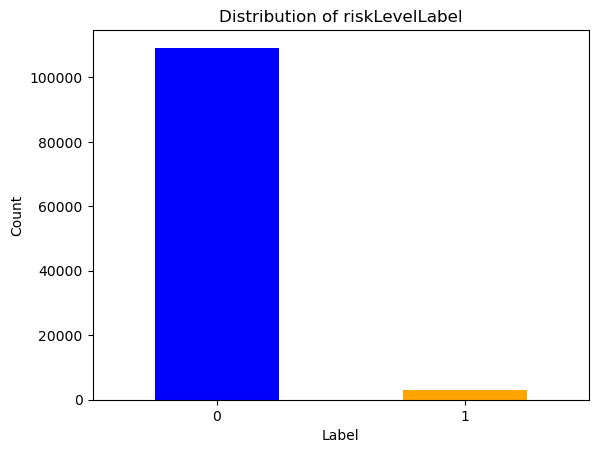

In [6]:
counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of riskLevelLabel')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

In [7]:
# Randomise order of training pairs
train_labels_mean_zero_new = train_labels_mean_zero.sample(frac = 1)

train_test_dict = {}

# Get CV Train and Test time-site pairs
for i in range(5):
  split_index = round(len(train_labels_mean_zero_new)/5)
  train_test_dict[f'test_{i+1}'] = train_labels_mean_zero_new[i*split_index: (i+1)*split_index]
  train_test_dict[f'train_{i+1}'] = train_labels_mean_zero_new.drop(train_labels_mean_zero_new.index[i*split_index: (i+1)*split_index])

In [12]:
ACCs_baseline=0
PREs_baseline=0
RECs_baseline=0
F1_baseline=0
APs_baseline=0
AUCs_ROC_baseline=0

for i in range(5):
    print(i+1,':')
    test_d = train_test_dict[f'test_{i+1}']
    train_d = train_test_dict[f'train_{i+1}']

    df_train = df_merged_mean_15x15.merge(train_d, on=['time', 'site'], how='inner')
    df_test = df_merged_mean_15x15.merge(test_d, on=['time', 'site'], how='inner')

    df_train.drop(['time', 'site'], axis=1, inplace=True)
    df_test.drop(['time', 'site'], axis=1, inplace=True)

    y_train = df_train.pop('riskLevelLabel')
    y_test = df_test.pop('riskLevelLabel')

    X_train = df_train
    X_test = df_test

    label_ratio_train = y_train.value_counts(normalize=True).to_dict()
    num_test_samples = len(X_test)
    np.random.seed(100)
    random_predictions_test = np.random.choice(list(label_ratio_train.keys()), num_test_samples, p=list(label_ratio_train.values()))

    accuracy_test = accuracy_score(y_test, random_predictions_test)    
    precision_test = precision_score(y_test, random_predictions_test)
    recall_test = recall_score(y_test, random_predictions_test)
    f1_test = f1_score(y_test, random_predictions_test)
    auc_test = roc_auc_score(y_test, random_predictions_test) 
    precision, recall, _ = precision_recall_curve(y_test, random_predictions_test)
    ap = average_precision_score(y_test, random_predictions_test)
    
    print(f'Accuracy: {accuracy_test:.2%}')
    print(f'AUC of ROC curve: {auc_test:.4}')
    print(f'Precision: {precision_test:.4}')
    print(f'Recall: {recall_test:.4}')
    print(f'AP: {ap:.4}')
    print(f'F1-score: {f1_test:.4}')
    print("Confusion matrix:\n", confusion_matrix(y_test, random_predictions_test))

    ACCs_baseline += accuracy_test
    PREs_baseline += precision_test
    RECs_baseline += recall_test
    F1_baseline += f1_test
    AUCs_ROC_baseline += auc_test
    APs_baseline += ap

1 :
Accuracy: 94.39%
AUC of ROC curve: 0.5002
Precision: 0.03069
Recall: 0.02802
AP: 0.03021
F1-score: 0.0293
Confusion matrix:
 [[21175   600]
 [  659    19]]
2 :
Accuracy: 94.64%
AUC of ROC curve: 0.4959
Precision: 0.01902
Recall: 0.0201
AP: 0.02644
F1-score: 0.01954
Confusion matrix:
 [[21237   619]
 [  585    12]]
3 :
Accuracy: 94.65%
AUC of ROC curve: 0.4984
Precision: 0.02377
Recall: 0.02496
AP: 0.02669
F1-score: 0.02435
Confusion matrix:
 [[21236   616]
 [  586    15]]
4 :
Accuracy: 94.73%
AUC of ROC curve: 0.4988
Precision: 0.02373
Recall: 0.02582
AP: 0.02582
F1-score: 0.02473
Confusion matrix:
 [[21255   617]
 [  566    15]]
5 :
Accuracy: 94.58%
AUC of ROC curve: 0.4981
Precision: 0.02381
Recall: 0.02431
AP: 0.02739
F1-score: 0.02406
Confusion matrix:
 [[21221   615]
 [  602    15]]


In [13]:
ACC_baseline = ACCs_baseline/5
PRE_baseline = PREs_baseline/5
REC_baseline = RECs_baseline/5
F1_baseline = F1_baseline/5
AUC_ROC_baseline = AUCs_ROC_baseline/5
AP_baseline = APs_baseline/5

In [15]:
results_mean_15x15_baseline = pd.DataFrame([['Baseline', ACC_baseline, AUC_ROC_baseline, PRE_baseline, REC_baseline, AP_baseline, F1_baseline]], 
                                           columns=['Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AP', 'f1 score'])
results_mean_15x15_baseline

,Model,Accuracy,AUC_ROC,Precision,Recall,AP,f1 score
0,Baseline,0.945976,0.498277,0.024206,0.024642,0.02731,0.024397
